In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from jupyterthemes import jtplot
jtplot.style(theme='chesterish', context='notebook', ticks=True, grid=False)

In [2]:
tweets = pd.read_csv('twitter_train.csv')
tweets.head()
#label 1 denotes that tweet is racist/sexist

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


<AxesSubplot:xlabel='label', ylabel='count'>

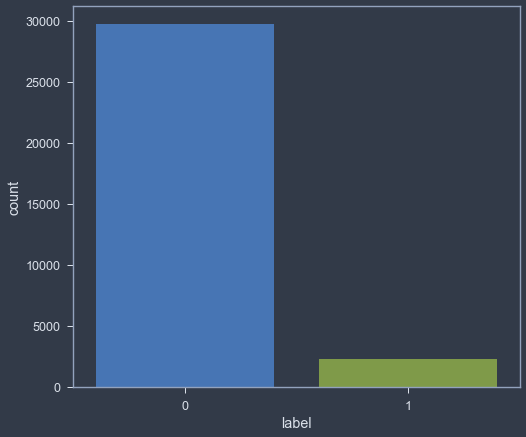

In [3]:
sns.countplot(x = tweets['label'])

In [4]:
tweets['length'] = tweets['tweet'].apply(len)
tweets

,id,label,tweet,length
0,1,0,@user when a father is dysfunctional and is s...,102
1,2,0,@user @user thanks for #lyft credit i can't us...,122
2,3,0,bihday your majesty,21
3,4,0,#model i love u take with u all the time in ...,86
4,5,0,factsguide: society now #motivation,39
...,...,...,...,...
31957,31958,0,ate @user isz that youuu?ðððððð...,68
31958,31959,0,to see nina turner on the airwaves trying to...,131
31959,31960,0,listening to sad songs on a monday morning otw...,63
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,...",67


<AxesSubplot:xlabel='length', ylabel='Count'>

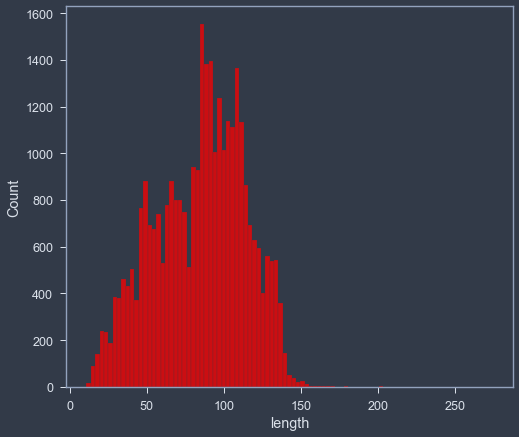

In [5]:
sns.histplot(tweets['length'],color = 'red')

In [6]:
positive = tweets[tweets['label'] == 0]
positive

,id,label,tweet,length
0,1,0,@user when a father is dysfunctional and is s...,102
1,2,0,@user @user thanks for #lyft credit i can't us...,122
2,3,0,bihday your majesty,21
3,4,0,#model i love u take with u all the time in ...,86
4,5,0,factsguide: society now #motivation,39
...,...,...,...,...
31956,31957,0,off fishing tomorrow @user carnt wait first ti...,61
31957,31958,0,ate @user isz that youuu?ðððððð...,68
31958,31959,0,to see nina turner on the airwaves trying to...,131
31959,31960,0,listening to sad songs on a monday morning otw...,63


In [7]:
negative = tweets[tweets['label'] == 1]
negative

,id,label,tweet,length
13,14,1,@user #cnn calls #michigan middle school 'buil...,74
14,15,1,no comment! in #australia #opkillingbay #se...,101
17,18,1,retweet if you agree!,22
23,24,1,@user @user lumpy says i am a . prove it lumpy.,47
34,35,1,it's unbelievable that in the 21st century we'...,104
...,...,...,...,...
31934,31935,1,lady banned from kentucky mall. @user #jcpenn...,59
31946,31947,1,@user omfg i'm offended! i'm a mailbox and i'...,82
31947,31948,1,@user @user you don't have the balls to hashta...,112
31948,31949,1,"makes you ask yourself, who am i? then am i a...",87


In [8]:
sentences = tweets['tweet'].tolist()

In [9]:
sentences_as_one_string = " ".join(sentences)

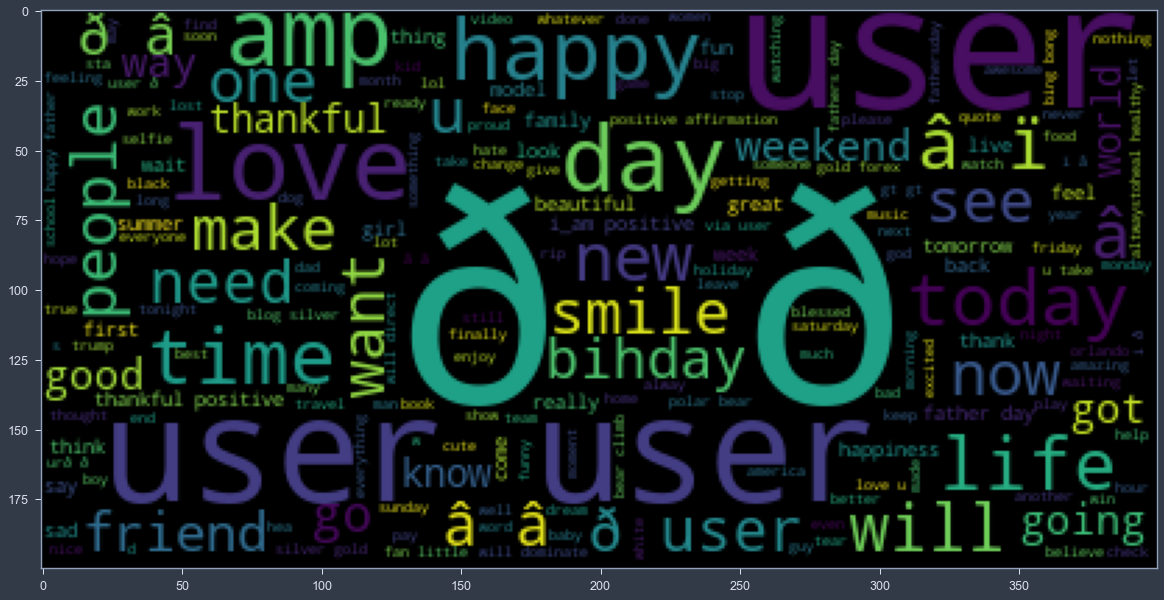

In [10]:
from wordcloud import WordCloud

plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(sentences_as_one_string))

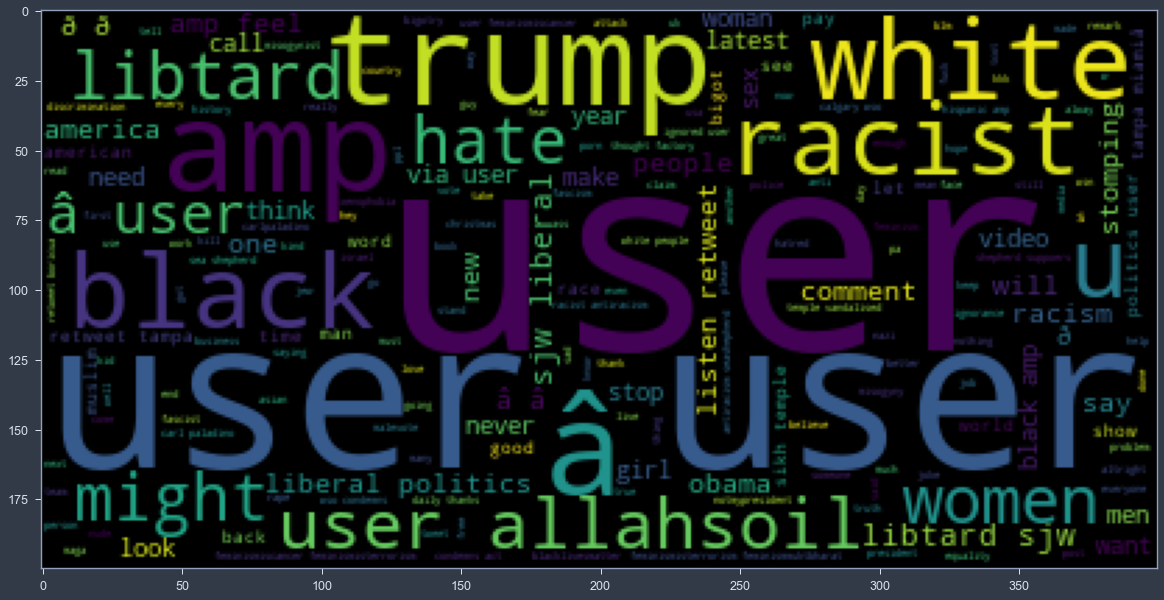

In [11]:
negative_sentences_as_one = " ".join(negative['tweet'].tolist())
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(negative_sentences_as_one))

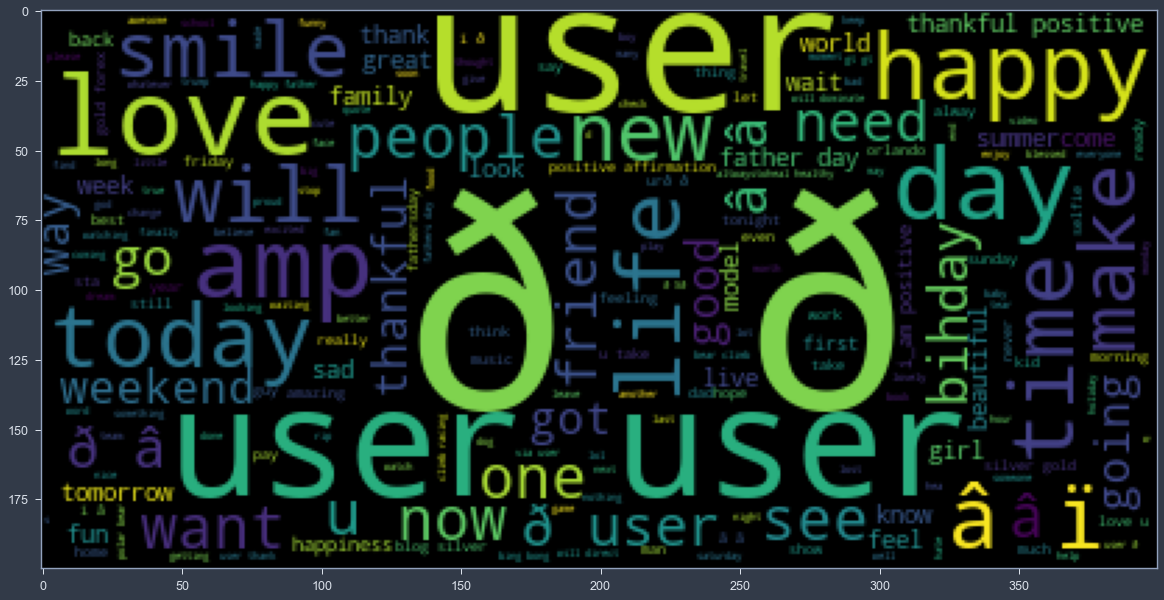

In [12]:
positive_sentences_as_one = " ".join(positive['tweet'].tolist())
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(positive_sentences_as_one))

In [13]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [14]:
Test = 'Hello World!!$ This.... is a test to (remove) punctuation@'

In [15]:
Test_punc_removed = [ c for c in Test if c not in string.punctuation]
Test_punc_removed

['H',
 'e',
 'l',
 'l',
 'o',
 ' ',
 'W',
 'o',
 'r',
 'l',
 'd',
 ' ',
 'T',
 'h',
 'i',
 's',
 ' ',
 'i',
 's',
 ' ',
 'a',
 ' ',
 't',
 'e',
 's',
 't',
 ' ',
 't',
 'o',
 ' ',
 'r',
 'e',
 'm',
 'o',
 'v',
 'e',
 ' ',
 'p',
 'u',
 'n',
 'c',
 't',
 'u',
 'a',
 't',
 'i',
 'o',
 'n']

In [16]:
Test_punc_removed_joined = "".join(Test_punc_removed)
Test_punc_removed_joined

'Hello World This is a test to remove punctuation'

In [17]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Tamoghno\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [18]:
from nltk.corpus import stopwords
", ".join(stopwords.words('english'))

"i, me, my, myself, we, our, ours, ourselves, you, you're, you've, you'll, you'd, your, yours, yourself, yourselves, he, him, his, himself, she, she's, her, hers, herself, it, it's, its, itself, they, them, their, theirs, themselves, what, which, who, whom, this, that, that'll, these, those, am, is, are, was, were, be, been, being, have, has, had, having, do, does, did, doing, a, an, the, and, but, if, or, because, as, until, while, of, at, by, for, with, about, against, between, into, through, during, before, after, above, below, to, from, up, down, in, out, on, off, over, under, again, further, then, once, here, there, when, where, why, how, all, any, both, each, few, more, most, other, some, such, no, nor, not, only, own, same, so, than, too, very, s, t, can, will, just, don, don't, should, should've, now, d, ll, m, o, re, ve, y, ain, aren, aren't, couldn, couldn't, didn, didn't, doesn, doesn't, hadn, hadn't, hasn, hasn't, haven, haven't, isn, isn't, ma, mightn, mightn't, mustn, mus

In [19]:
Test_punc_removed_join_clean = [word for word in Test_punc_removed_joined.split() if word.lower() not in stopwords.words('english')]
Test_punc_removed_join_clean

['Hello', 'World', 'test', 'remove', 'punctuation']

In [20]:
from sklearn.feature_extraction.text import CountVectorizer
sample_data = ['This is the first line.','This line is the second line.','And this is the third one.', 'is this the first line.']

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(sample_data)

In [21]:
print(vectorizer.get_feature_names())

['and', 'first', 'is', 'line', 'one', 'second', 'the', 'third', 'this']


In [22]:
print(X.toarray())

[[0 1 1 1 0 0 1 0 1]
 [0 0 1 2 0 1 1 0 1]
 [1 0 1 0 1 0 1 1 1]
 [0 1 1 1 0 0 1 0 1]]


In [23]:
def message_cleaning(message):
    Test_punc_removed = [char for char in message if char not in string.punctuation]
    Test_punc_removed_join = ''.join(Test_punc_removed)
    Test_punc_removed_join_clean = [word for word in Test_punc_removed_join.split() if word.lower() not in stopwords.words('english')]
    return Test_punc_removed_join_clean

In [24]:
vectorizer = CountVectorizer(analyzer = message_cleaning, dtype = 'uint8')
tweets_countvectorizer = vectorizer.fit_transform(tweets['tweet'])

In [25]:
print(tweets_countvectorizer.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [26]:
tweets_countvectorizer.shape

(31962, 47386)

In [27]:
X = pd.DataFrame(tweets_countvectorizer.toarray())
X

,0,1,2,3,4,5,6,7,8,9,...,47376,47377,47378,47379,47380,47381,47382,47383,47384,47385
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31957,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31958,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31959,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31960,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
y = tweets['label']

In [29]:
X.shape

(31962, 47386)

In [30]:
y.shape

(31962,)

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [32]:
from sklearn.naive_bayes import MultinomialNB

NB_classifier = MultinomialNB()
NB_classifier.fit(X_train, y_train)

MultinomialNB()

In [33]:
from sklearn.metrics import classification_report, confusion_matrix

<AxesSubplot:>

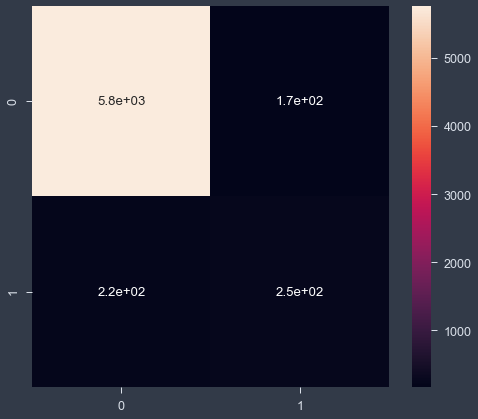

In [34]:
y_predict_test = NB_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True)

In [35]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97      5929
           1       0.59      0.53      0.56       464

    accuracy                           0.94      6393
   macro avg       0.78      0.75      0.76      6393
weighted avg       0.94      0.94      0.94      6393



In [36]:
from sklearn.neural_network import MLPClassifier
mlp_classifier = MLPClassifier(hidden_layer_sizes=(8,4,4), early_stopping=True) 
mlp_classifier.fit(X_train, y_train)

MLPClassifier(early_stopping=True, hidden_layer_sizes=(8, 4, 4))

In [37]:
y_predict_test_3 = mlp_classifier.predict(X_test)
print(classification_report(y_test, y_predict_test_3))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96      5929
           1       0.00      0.00      0.00       464

    accuracy                           0.93      6393
   macro avg       0.46      0.50      0.48      6393
weighted avg       0.86      0.93      0.89      6393



C:\Users\Tamoghno\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
